<a href="https://colab.research.google.com/github/Tithi9720/Helpdesk2-/blob/master/GooglePlaystore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
path = "/content/drive/MyDrive/Dataset/Googleplaystore Dataset.csv"
df = pd.read_csv(path, encoding='latin-1')
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite  FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Query**

In [ ]:
#1	Find apps with rating >= 4.5.

high_rated_apps = df.query('Rating > 4.5')
print(high_rated_apps)

                                                   App             Category  \
2    U Launcher Lite  FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
9                        Kids Paint Free - Drawing Fun       ART_AND_DESIGN   
13                               Mandala Coloring Book       ART_AND_DESIGN   
16        Photo Designer - Write your name with shapes       ART_AND_DESIGN   
19                                        ibis Paint X       ART_AND_DESIGN   
22             Superheroes Wallpapers | 4K Backgrounds       ART_AND_DESIGN   
24                         HD Mickey Minnie Wallpapers       ART_AND_DESIGN   
25                          Harley Quinn wallpapers HD       ART_AND_DESIGN   
26                       Colorfit - Drawing & Coloring       ART_AND_DESIGN   
34                                     I Creative Idea       ART_AND_DESIGN   
36      UNICORN - Color By Number & Pixel Art Coloring       ART_AND_DESIGN   
38                      PIP Camera - PIP Collage Mak

In [ ]:
# 2. Find apps with size  > 20 mb.

In [ ]:
# Rename columns for easier access
df.columns = df.columns.str.replace(' ', '_')

# Function to convert size to MB
def convert_size(size):
    if isinstance(size, str):
        if size.endswith('M'):
            return float(size[:-1])
        elif size.endswith('k'):
            return float(size[:-1]) / 1024  # Convert KB to MB
    return None  # If the size is 'Varies with device' or any other value

In [ ]:
# Apply the conversion function
df['Size_MB'] = df['Size'].apply(convert_size)

# Filter apps with size greater than 20 MB
apps_over_20mb = df.query('Size_MB > 20')
print(apps_over_20mb)

                                                   App             Category  \
3                                Sketch - Draw & Paint       ART_AND_DESIGN   
7                                     Infinite Painter       ART_AND_DESIGN   
8                                 Garden Coloring Book       ART_AND_DESIGN   
10                             Text on Photo - Fonteee       ART_AND_DESIGN   
13                               Mandala Coloring Book       ART_AND_DESIGN   
14     3D Color Pixel by Number - Sandbox Art Coloring       ART_AND_DESIGN   
18                       FlipaClip - Cartoon animation       ART_AND_DESIGN   
19                                        ibis Paint X       ART_AND_DESIGN   
24                         HD Mickey Minnie Wallpapers       ART_AND_DESIGN   
26                       Colorfit - Drawing & Coloring       ART_AND_DESIGN   
36      UNICORN - Color By Number & Pixel Art Coloring       ART_AND_DESIGN   
45   Canva: Poster, banner, card maker & graphic de.

In [ ]:
# 3. Find apps with installs > 1 million.

# Remove commas and the '+' character from 'Installs' column
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '')

In [ ]:
# Convert to numeric, handling NaN values
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce').fillna(0).astype(int)

In [ ]:
apps_over_1million_installs = df.query('Installs > 1000000')
print(apps_over_1million_installs)

                                                   App             Category  \
2    U Launcher Lite  FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                Sketch - Draw & Paint       ART_AND_DESIGN   
12                      Tattoo Name On My Photo Editor       ART_AND_DESIGN   
18                       FlipaClip - Cartoon animation       ART_AND_DESIGN   
19                                        ibis Paint X       ART_AND_DESIGN   
37                                  Floor Plan Creator       ART_AND_DESIGN   
42                          Textgram - write on photos       ART_AND_DESIGN   
45   Canva: Poster, banner, card maker & graphic de...       ART_AND_DESIGN   
67                                  Ulysse Speedometer    AUTO_AND_VEHICLES   
69                         Used cars for sale - Trovit    AUTO_AND_VEHICLES   
70   Fines of the State Traffic Safety Inspectorate...    AUTO_AND_VEHICLES   
72       Android Auto - Maps, Media, Messaging & Voi

In [ ]:
# 4. Sort apps in ascending order by no of reviews.


# Sort apps in ascending order by number of reviews
sorted_apps = df.sort_values(by='Reviews', ascending=True)
print(sorted_apps)

                                             App             Category  Rating  \
180          SH-02J Owner's Manual (Android 8.0)  BOOKS_AND_REFERENCE     NaN   
128                                Makeup Videos               BEAUTY     3.8   
132                   Eyeliner step by step 2018               BEAUTY     4.3   
44   Popsicle Sticks and Similar DIY Craft Ideas       ART_AND_DESIGN     4.2   
17                      350 Diy Room Decor Ideas       ART_AND_DESIGN     4.5   
..                                           ...                  ...     ...   
393                                          NaN                  NaN     NaN   
394                                          NaN                  NaN     NaN   
395                                          NaN                  NaN     NaN   
396                                          NaN                  NaN     NaN   
397                                          NaN                  NaN     NaN   

     Reviews  Size  Install

In [ ]:
# 5. Sort games in descending order by installs.
games_df = df.query('Category == "GAME"')

sorted_games = games_df.sort_values(by='Installs', ascending=False)
print(sorted_games)




Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content_Rating, Genres, Last_Updated, Current_Ver, Android_Ver, Size_MB]
Index: []


In [ ]:
# 6	Apply the SUM() function on reviews.

total_reviews = df['Reviews'].sum()
print(total_reviews)

14816285.0


In [ ]:
# 7.Find the average rating of apps.

average_rating = df['Rating'].mean()
print(average_rating)


4.3265957446808505


In [ ]:
#8	Find mean and median of rating.

mean_rating = df['Rating'].mean()
median_rating = df['Rating'].median()
print(mean_rating)
print(median_rating)

4.3265957446808505
4.4


In [ ]:
# 9	Fill null values with mean for any one numeric column.

df['Rating'].fillna(df['Rating'].mean(), inplace=True)
print(df)

                                                   App        Category  \
0       Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN   
1                                  Coloring book moana  ART_AND_DESIGN   
2    U Launcher Lite  FREE Live Cool Themes, Hide ...  ART_AND_DESIGN   
3                                Sketch - Draw & Paint  ART_AND_DESIGN   
4                Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN   
..                                                 ...             ...   
393                                                NaN             NaN   
394                                                NaN             NaN   
395                                                NaN             NaN   
396                                                NaN             NaN   
397                                                NaN             NaN   

       Rating   Reviews  Size  Installs  Type  Price Content_Rating  \
0    4.100000     159.0   19M     10000 

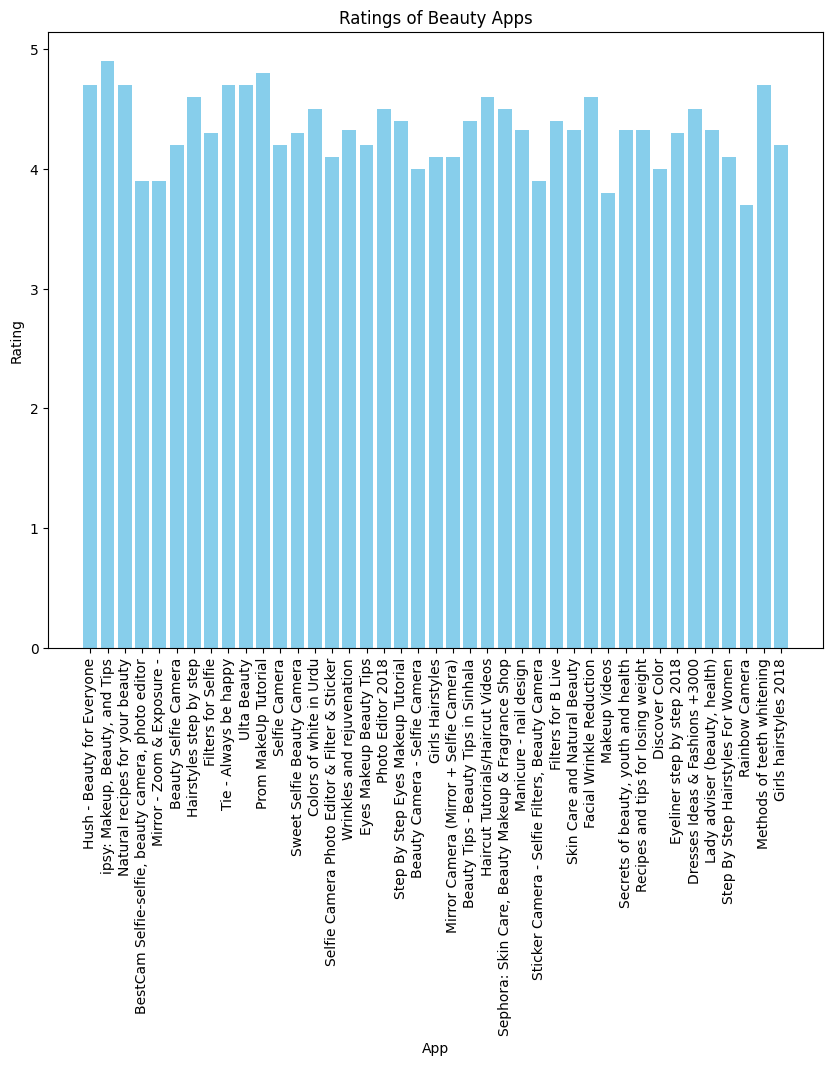

In [ ]:
# 10	Plot bar chart for the columns Category="Beauty" and Ratings

# Filter for Beauty category
beauty_df = df.query('Category == "BEAUTY"')

plt.figure(figsize=(10, 8))
plt.bar(beauty_df['App'], beauty_df['Rating'], color='skyblue')
plt.xlabel('App')
plt.ylabel('Rating')
plt.title('Ratings of Beauty Apps')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()
